# Example Runge Kutta

The general form of the population growth differential equation
$$ y^{'}=t-y, \ \ (0 \leq t \leq 4) $$
with the initial condition
$$y(0)=1,$$
Has the exact soulation. $$ y= 2e^{-t}+t-1$$



#### Setting up Libraries

In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


## Defining the function
$$f(t,y)=t-y$$ 

In [2]:
def myfun_ty(t,y):
    return t-y

## Initial Setup
Defining the step size $h$ from the interval range $a\leq t \leq b$ and number of steps $N$
$$h=\frac{b-a}{h}.$$
This gives the discrete time steps,
$$t_{i}=t_0+ih,$$
where $t_0=a$.

In [3]:
# Start and end of interval
b=4
a=0
# Step size
N=8
h=(b-a)/(N)
t=np.arange(a,b+h,h)

## Setting up the initial conditions of the equation
$$w_0=IC$$


In [4]:
# Initial Condition
IC=1
w=np.zeros(N+1)
y=(IC+1)*np.exp(-t)+t-1#np.zeros(N+1)
w[0]=IC

## 4th Order Runge Kutta (Mid-method)
$$k_1=f(t,y),$$
$$k_2=f(t+\frac{h}{2},y+\frac{h}{2}k_2),$$
$$k_3=f(t+\frac{h}{2},y+\frac{h}{2}k_2),$$
$$k_4=f(t+\frac{h}{2},y+\frac{h}{2}k_3),$$
$$w_{i+1}=w_{i}+\frac{h}{6}(k_1+2k_2+2k_3+k_4).$$

In [5]:
for k in range (0,N):
    k1=myfun_ty(t[k],w[k])
    k2=myfun_ty(t[k]+h/2,w[k]+h/2*k1)
    k3=myfun_ty(t[k]+h/2,w[k]+h/2*k2)
    k4=myfun_ty(t[k]+h,w[k]+h*k3)
    w[k+1]=w[k]+h/6*(k1+2*k2+2*k3+k4)

## Plotting Results

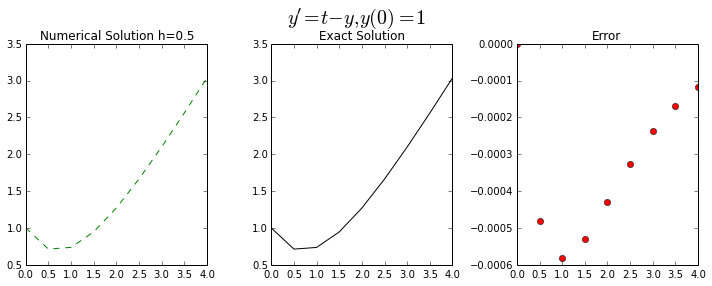

In [6]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='green')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,y,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,y-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$y'=t-y,   y(0)=%s$"%(IC), fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.85)    